<a href="https://colab.research.google.com/github/jvpalhares/IA353-vonzuben/blob/main/PC1_Ativ3_ELM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook PC1_Ativ3**
## Regularized ELM Classifier for the MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist

# xp = xtrain
# xtp = xtest
# y = ytrain
# yt = ytest

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

X = Xa / 255.0
Xt = Xta / 255.0

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  Xt.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [2]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)

# yy = treino
# yyt = teste

print(yy[0])

sum_along_columns1 = np.sum(yy, axis = 0)
print("Treino = ", sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print("Teste = ",sum_along_columns2)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Treino =  [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
Teste =  [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [3]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("index", index_training)

# ELM X
# We will concatenate a column of 1's to account for the V0 of each hidden neuron later on
X_training_elm = np.concatenate((np.transpose(np.array([np.ones(X_training.shape[0])])), X_training), axis=1)
X_validation_elm = np.concatenate((np.transpose(np.array([np.ones(X_validation.shape[0])])), X_validation), axis=1)

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

print("X_training_elm:".ljust(20), X_training_elm.shape)
print("X_validation_elm:".ljust(20), X_validation_elm.shape)

index [59109  5813  5492 ... 56975 51554 53468]
X_training:          (42000, 784)
y_training:          (42000, 10)
X_validation:        (18000, 784)
y_validation:        (18000, 10)
X_training_elm:      (42000, 785)
X_validation_elm:    (18000, 785)


In [4]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_ 

In [5]:
def leaky_relu(table):
    return np.where(table > 0, table,  0.02 * table)

def relu(table):
    return np.where(table > 0, table,  0)

def get_h(X, V, activation_function): 
    V_ = np.matmul(X, V)
    return activation_function(V_)

def get_w(X, y, c): 
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w

In [6]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []
    
    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)
        
        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [27]:
# Standard deviation of the random weight generation at the hidden layer
sigma = 0.2
# Number of inputs for the MNIST dataset: 785
# Number of inputs for the CIFAR10 dataset: 3073
# Take 1000 hidden neurons for the MNIST dataset and 2000 for the CIFAR10 dataset.
aux = np.random.randn(785, 1000)
V  = sigma * aux
print(aux)

[[-0.79608103 -0.39476314 -0.12030972 ...  0.98037019  0.07741388
  -0.54100443]
 [ 0.55911571  0.35944505  0.31608185 ... -0.38376687 -0.21656828
  -0.336929  ]
 [ 0.66220328 -1.19493075  0.05440521 ... -0.69564709 -0.07867033
   0.22899151]
 ...
 [ 1.79933318  0.06330991 -0.57038974 ...  1.71582679  0.36336412
  -0.04730716]
 [-0.21644328  2.00433657 -0.89021534 ...  0.50267777 -2.21749414
  -0.04573655]
 [-0.76947822 -0.2931835  -1.2127372  ... -0.90472659 -1.20972628
  -0.42564479]]


In [28]:
c_values = [pow(2,d) for d in range(-16, 14, 2)]

hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096


In [29]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096


Best c value: 64 
Performance of this value: 0.9401666666666667


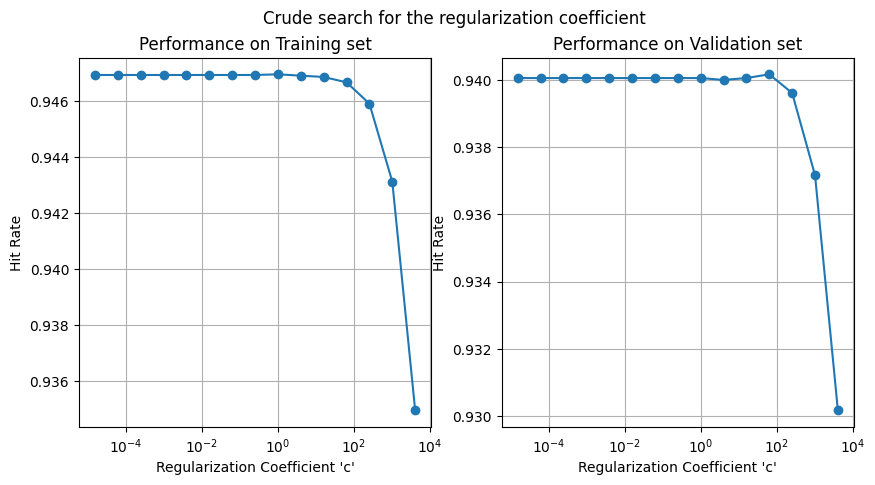

In [30]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


Testando com outros intervalos

In [31]:
c_values = [pow(2,d) for d in range(-10, 12, 2)]

hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024


In [32]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024


Best c value: 64 
Performance of this value: 0.9401666666666667


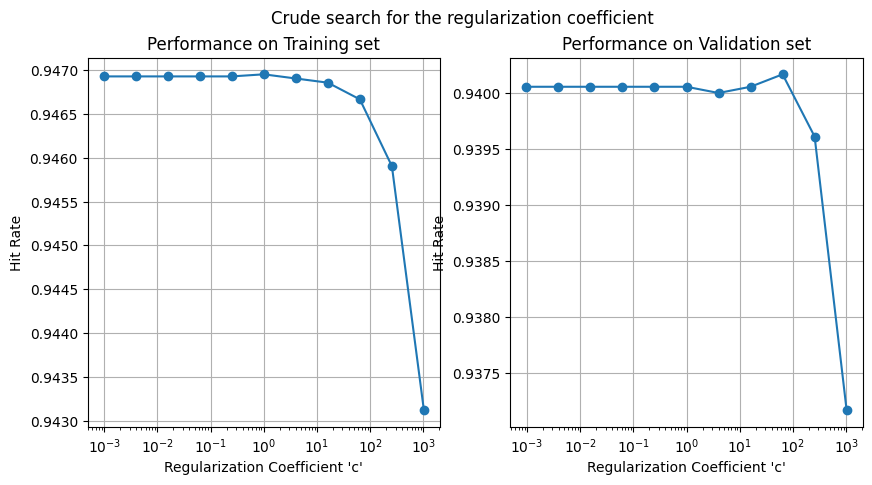

In [33]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


**Resposta da 1:** Modificando de (-16, 14, 2) para (-10, 12, 2), é possível definir que indifere a importância das regularizações. Ambos os casos garantiram um pico com o mesmo C value e performance, de 64 e 0,941, respectivamente.



In [14]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, fine_c_values)

1.0
2.5
4.0
5.5
7.0
8.5
10.0
11.5
13.0
14.5
16.0


In [15]:
hit_rates_validation_fine, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, fine_c_values, Ws_fine)

1.0
2.5
4.0
5.5
7.0
8.5
10.0
11.5
13.0
14.5
16.0


Best c value: 4.0 
Performance of this value: 0.9397222222222222


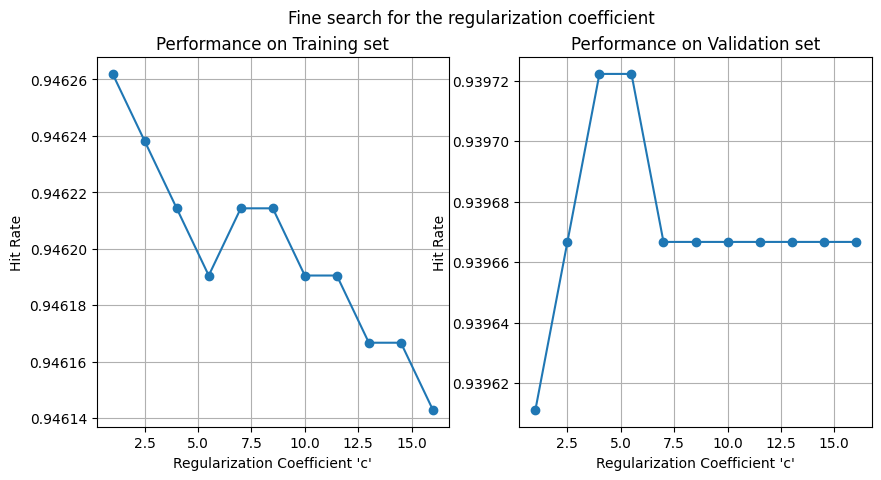

In [16]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [17]:
X_elm = np.concatenate((np.transpose(np.array([np.ones(X.shape[0])])), X), axis=1)
W_elm = get_w(get_h(X_elm, V, relu), yy, best_c)

In [18]:
Xt_elm = np.concatenate((np.transpose(np.array([np.ones(Xt.shape[0])])), Xt), axis=1)
yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.9409
[[ 966    0    9    1    1    9   13    2    5    7]
 [   0 1120    4    0    7    1    3   18    5    6]
 [   1    3  954    7    3    0    4   16    7    1]
 [   1    3   10  948    0   15    1    3   17   10]
 [   0    1    6    1  919    7    3    8   11   24]
 [   4    0    0   20    1  824   11    0   15   12]
 [   5    4    7    3   10   15  920    0    9    1]
 [   1    0   14    9    4    5    1  950   10   17]
 [   2    4   27   13    4   11    2    4  882    5]
 [   0    0    1    8   33    5    0   27   13  926]]


**Resposta da 2:**

O ganho de desempenho na taxa de acerto de classificação obtido pelo classificador ELM em relação ao classificador linear pode ser explicado pelas diferenças nos modelos de aprendizado utilizados.

O classificador linear da atividade 1 é baseado em uma função de decisão linear, que divide o espaço de características em duas regiões de decisão por meio de uma reta. Embora seja simples e fácil de implementar, esse modelo pode ser limitado em casos em que a relação entre as características e as classes é mais complexa.

Já o classificador ELM utiliza uma abordagem não linear baseada em redes neurais de uma única camada oculta, em que os pesos são aleatórios e as saídas dos neurônios ocultos são calculadas por meio de uma função de ativação não linear. A camada de saída é formada por uma combinação linear dos resultados dos neurônios ocultos. Essa abordagem permite capturar relações mais complexas entre as características e as classes, o que pode levar a um melhor desempenho de classificação.

Além disso, o ELM possui uma estratégia de treinamento mais rápida em comparação a outras redes neurais, pois os pesos são definidos aleatoriamente e calculados de forma analítica, sem a necessidade de ajuste iterativo. Isso torna o ELM mais eficiente em termos computacionais e permite treinar modelos com grande quantidade de dados em menos tempo.

Portanto, a combinação da abordagem não linear baseada em redes neurais e a estratégia de treinamento eficiente do ELM pode explicar o ganho de desempenho na taxa de acerto de classificação em relação ao classificador linear da atividade anterior, mesmo utilizando a mesma estratégia de otimização.

Image no. 8


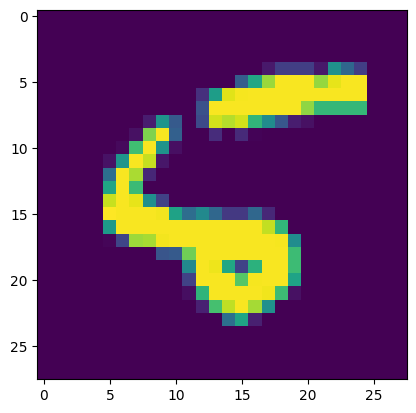

Real: 5
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-1.91852134e-04  7.66803013e-02  1.50565170e-01 -1.61347813e-01
  4.21055420e-01  3.94113977e-01  3.54448571e-01 -1.83401071e-01
 -1.16843705e-01  1.36169794e-01] 

Image no. 77


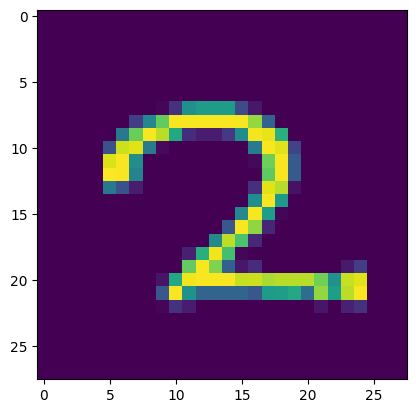

Real: 2
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.07933427 -0.00066789  0.32399776 -0.06060098  0.08575924 -0.04830951
 -0.0106979   0.35344248  0.25711156 -0.07011673] 

Image no. 80


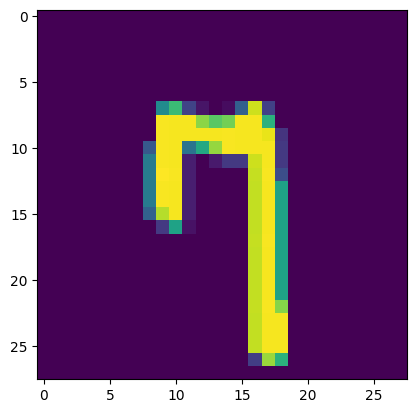

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [-0.0202891   0.08853391 -0.09141155 -0.17260853  0.00071607  0.11799335
  0.06167934  0.47171958  0.02216414  0.57501569] 

Image no. 115


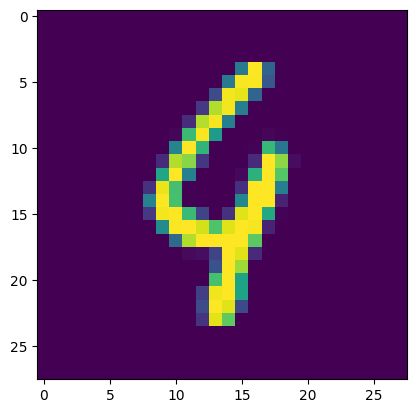

Real: 4
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.02395666  0.16561705  0.0650151  -0.09595427  0.38087236 -0.15742094
  0.22337495 -0.09523629 -0.00205355  0.51389721] 

Image no. 124


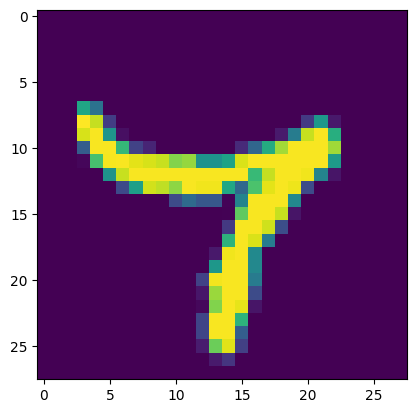

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.06544914 -0.08263725 -0.02181765  0.17658826  0.46799602 -0.01934013
  0.12069485  0.44725946 -0.08157502  0.1552705 ] 

Image no. 149


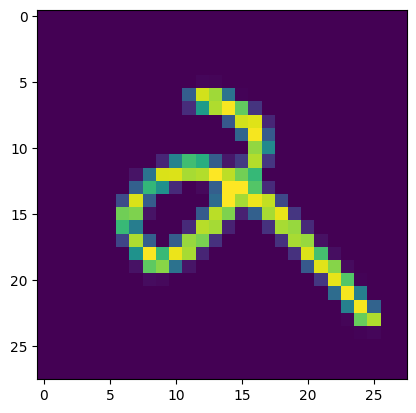

Real: 2
Predicted: 9
Rank of the correct answer: 6
Probabilities: [-0.13594934  0.14646196  0.14265151  0.17477827  0.04611306  0.21280502
  0.2271695  -0.12363244  0.03249967  0.2674119 ] 



In [19]:
# Devoted solely to the MNIST dataset
def find_pos(item, lst): 
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z] 
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")